# INSURANCE CLAIMS - FRAUD DETECTION

## Content

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Importing Dataset

In [182]:
import pandas as pd
insurance_fraud=pd.read_csv('automobile_insurance_fraud.csv')
insurance_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Putting the Data in Data Frame

In [183]:
ic=pd.DataFrame(data=insurance_fraud)
ic.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [184]:
ic.shape

(1000, 40)

In [185]:
ic.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [186]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [187]:
# Column _c39 has all null values so we'll drop it
ic.drop(['_c39'], axis=1, inplace=True)
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**Now no null values are present in our dataset**

## Exploratory Data Analysis

In [188]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [189]:
ic.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [190]:
# Checking all the years from variable auto_year
ic.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [191]:
# Checking age of the  vehicle by subtracting auto_year
ic['Vehicle_age']= 2015 - ic['auto_year']
ic['Vehicle_age'].head()

0    11
1     8
2     8
3     1
4     6
Name: Vehicle_age, dtype: int64

**We can see the age of the vehicle ablove in the newly created variable Vehicle_age**

In [192]:
ic['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
10    46
13    46
6     44
14    43
9     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [193]:
# Replacing incident_hour_of_the_day with incident_period_of_the_day
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
name = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
ic['incident_period_of_the_day'] = pd.cut(ic.incident_hour_of_the_day, bins, labels=name).astype(object)
ic[['incident_hour_of_the_day', 'incident_period_of_the_day']].head(10)

,incident_hour_of_the_day,incident_period_of_the_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


**We can see the perid of the incident is showing perfectly**

In [194]:
ic.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [195]:
# Dropping the columns which are not providing important information
ic.drop(['policy_number', 'insured_zip', 'policy_bind_date', 'incident_date', 'incident_location', 'auto_year',
         'incident_hour_of_the_day'], axis=1, inplace=True)
ic.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Vehicle_age,incident_period_of_the_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,Y,11,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,Y,8,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,N,8,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,1,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,N,6,evening


Unique Values : ['FEMALE' 'MALE']
Frequency Values : [537, 463]


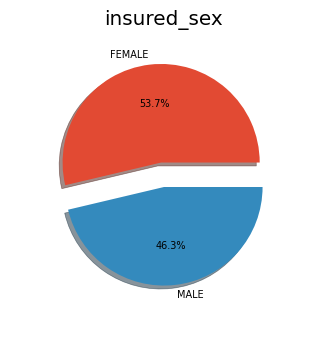

In [196]:
# Counting the frequency of unique elements
list_=ic['insured_sex']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for insured_sex

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('insured_sex')
plt.show()

**More than 50% of females are insured ones**

Unique Values : ['Associate' 'College' 'High School' 'JD' 'MD' 'Masters' 'PhD']
Frequency Values : [145, 122, 160, 161, 144, 143, 125]


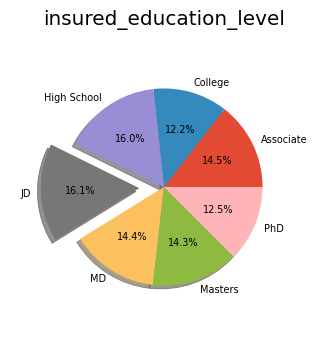

In [197]:
# Counting the frequency of unique elements
list_=ic['insured_education_level']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for insured_education_level

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('insured_education_level')
plt.show()

**Most of the people are with education level of JD and High School and least people are with education level of College**

Unique Values : ['adm-clerical' 'armed-forces' 'craft-repair' 'exec-managerial'
 'farming-fishing' 'handlers-cleaners' 'machine-op-inspct' 'other-service'
 'priv-house-serv' 'prof-specialty' 'protective-serv' 'sales'
 'tech-support' 'transport-moving']
Frequency Values : [65, 69, 74, 76, 53, 54, 93, 71, 71, 85, 63, 76, 78, 72]


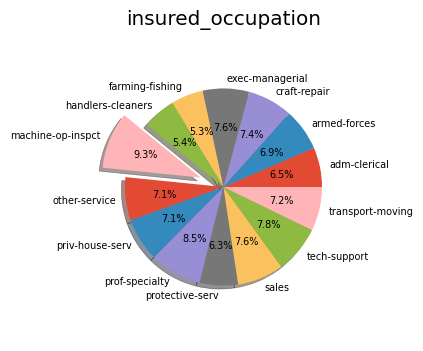

In [198]:
# Counting the frequency of unique elements
list_=ic['insured_occupation']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for insured_occupation

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('insured_occupation')
plt.show()

**Most people have the occupation of Machien-op-inspct and least people have the occupation of Farming-Fishing**

Unique Values : ['base-jumping' 'basketball' 'board-games' 'bungie-jumping' 'camping'
 'chess' 'cross-fit' 'dancing' 'exercise' 'golf' 'hiking' 'kayaking'
 'movies' 'paintball' 'polo' 'reading' 'skydiving' 'sleeping'
 'video-games' 'yachting']
Frequency Values : [49, 34, 48, 56, 55, 46, 35, 43, 57, 55, 52, 54, 55, 57, 47, 64, 49, 41, 50, 53]


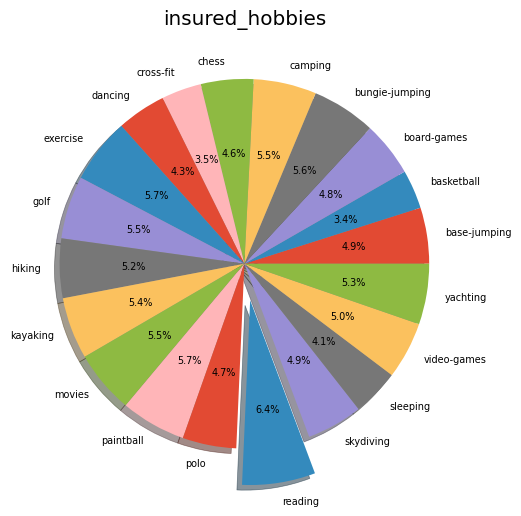

In [199]:
# Counting the frequency of unique elements
list_=ic['insured_hobbies']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for insured_hobbies

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=1, textprops={'fontsize':7})
plt.title('insured_hobbies')
plt.show()

**Most people have the hobby of reading and least people are the ones who like to play basketball**

Unique Values : ['husband' 'not-in-family' 'other-relative' 'own-child' 'unmarried' 'wife']
Frequency Values : [170, 174, 177, 183, 141, 155]


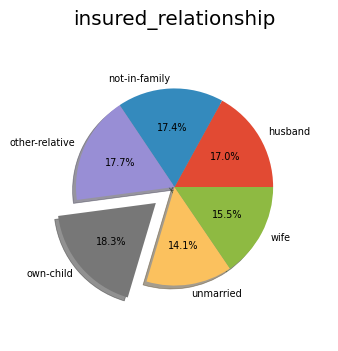

In [200]:
# Counting the frequency of unique elements
list_=ic['insured_relationship']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for insured_relationship

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('insured_relationship')
plt.show()

**Most people have the relationship 'own-child and least people are unmarried'**

Unique Values : ['Multi-vehicle Collision' 'Parked Car' 'Single Vehicle Collision'
 'Vehicle Theft']
Frequency Values : [419, 84, 403, 94]


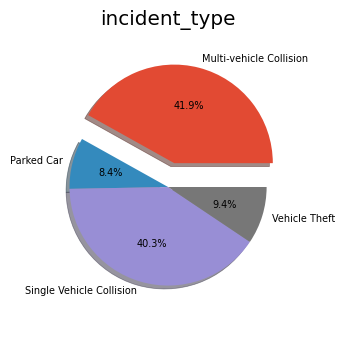

In [201]:
# Counting the frequency of unique elements
list_=ic['incident_type']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for incident_type

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('incident_type')
plt.show()

**Most incidents are Multi-vehicle-collision and least are parked car**

Unique Values : ['?' 'Front Collision' 'Rear Collision' 'Side Collision']
Frequency Values : [178, 254, 292, 276]


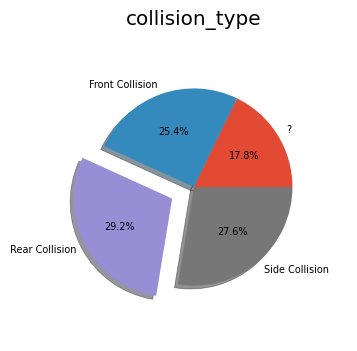

In [202]:
# Counting the frequency of unique elements
list_=ic['collision_type']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot forcollisiont_type

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('collision_type')
plt.show()

**Most collsions are Rear collision and least are unknown**

Unique Values : ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
Frequency Values : [276, 354, 280, 90]


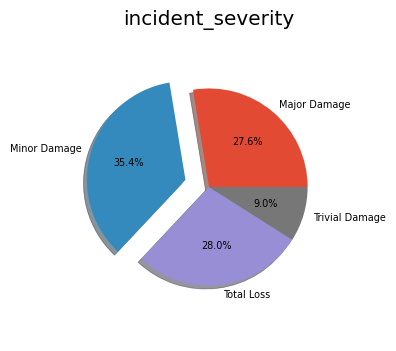

In [203]:
# Counting the frequency of unique elements
list_=ic['incident_severity']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for incident_severity

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('incident_severity')
plt.show()

**Most vehicles got minor damages and least got Trivial Damage**

Unique Values : ['Ambulance' 'Fire' 'None' 'Other' 'Police']
Frequency Values : [196, 223, 91, 198, 292]


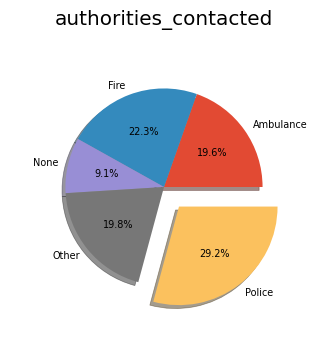

In [204]:
# Counting the frequency of unique elements
list_=ic['authorities_contacted']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for authorities_contacted

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('authorities_contacted')
plt.show()

**Police have been contacted the most and less than 10% have called no one**

Unique Values : ['NC' 'NY' 'OH' 'PA' 'SC' 'VA' 'WV']
Frequency Values : [110, 262, 23, 30, 248, 110, 217]


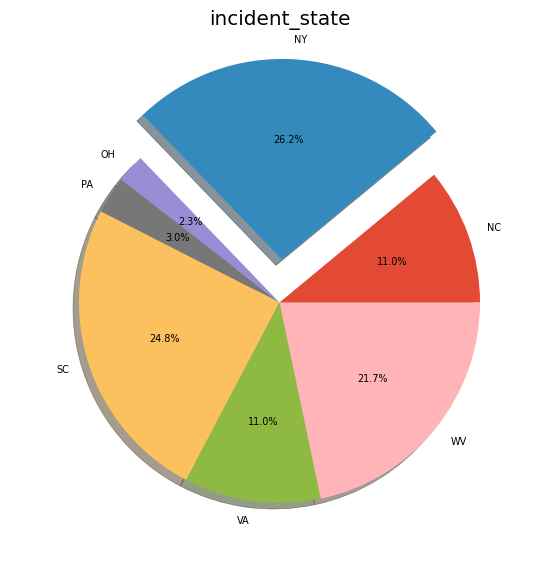

In [205]:
# Counting the frequency of unique elements
list_=ic['incident_state']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for incident_state

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(7,7),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.93, textprops={'fontsize':7})
plt.title('incident_state')
plt.show()

**Most incidents took place in NY and least in OH**

Unique Values : ['Arlington' 'Columbus' 'Hillsdale' 'Northbend' 'Northbrook' 'Riverwood'
 'Springfield']
Frequency Values : [152, 149, 141, 145, 122, 134, 157]


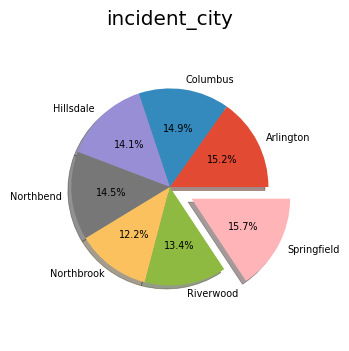

In [206]:
# Counting the frequency of unique elements
list_=ic['incident_city']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for incident_city

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('incident_city')
plt.show()

**Most incidents took place in Springfield and least in Northbrrok**

Unique Values : [1 2 3 4]
Frequency Values : [581, 30, 358, 31]


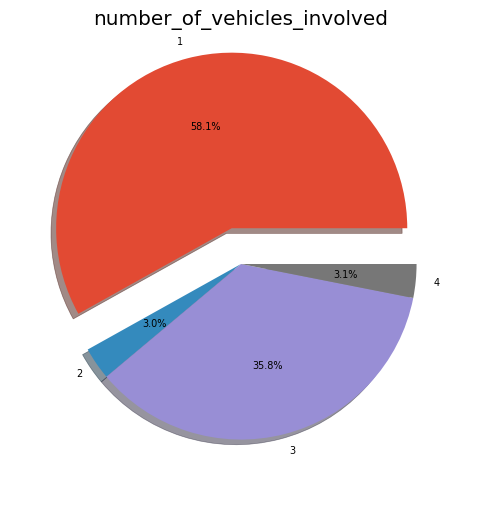

In [207]:
# Counting the frequency of unique elements
list_=ic['number_of_vehicles_involved']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for number_of_vehicles_involved

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.95, textprops={'fontsize':7})
plt.title('number_of_vehicles_involved')
plt.show()

**In most incidents only 1 vehicle is involved and in very few incidents 2 and 4 vehicles involved**

Unique Values : ['?' 'NO' 'YES']
Frequency Values : [360, 338, 302]


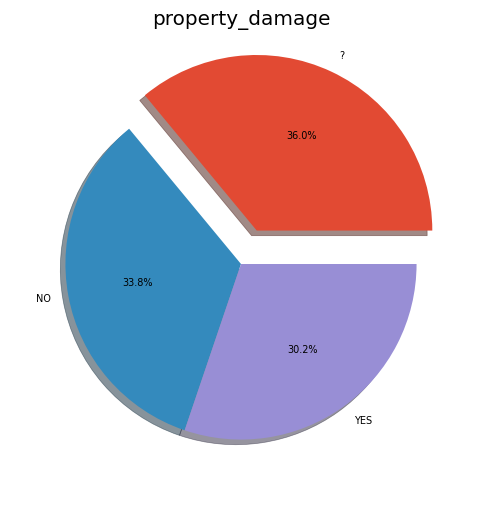

In [208]:
# Counting the frequency of unique elements
list_=ic['property_damage']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for property_damage

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.95, textprops={'fontsize':7})
plt.title('property_damage')
plt.show()

**In most cases property damage is unknown**

Unique Values : [0 1 2]
Frequency Values : [340, 328, 332]


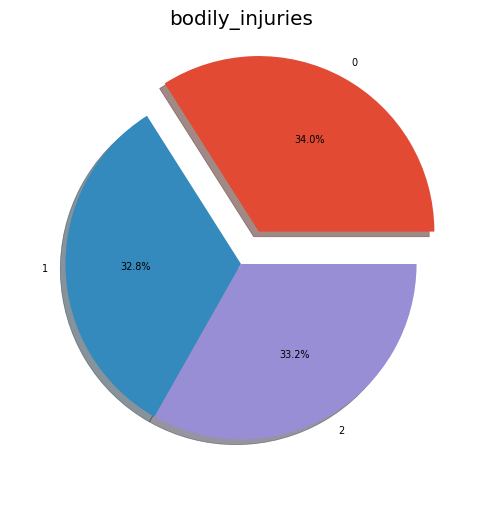

In [209]:
# Counting the frequency of unique elements
list_=ic['bodily_injuries']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for bodily_injuries

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.95, textprops={'fontsize':7})
plt.title('bodily_injuries')
plt.show()

**In 32% cases only one person is injured and in most cases no one is injured**

Unique Values : [0 1 2 3]
Frequency Values : [249, 258, 250, 243]


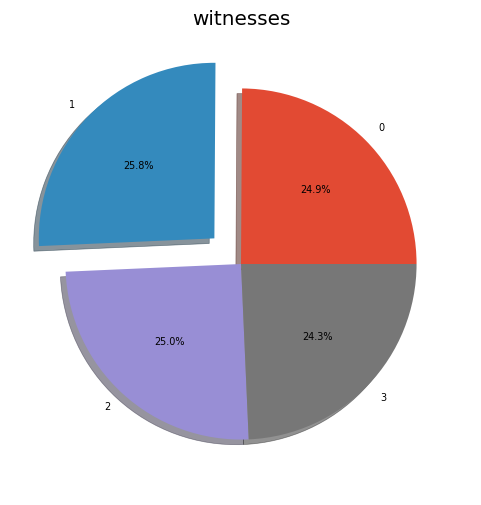

In [210]:
# Counting the frequency of unique elements
list_=ic['witnesses']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for witnesses

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.95, textprops={'fontsize':7})
plt.title('witnesses')
plt.show()

**In 24.9% cases there is no witness**

Unique Values : ['?' 'NO' 'YES']
Frequency Values : [343, 343, 314]


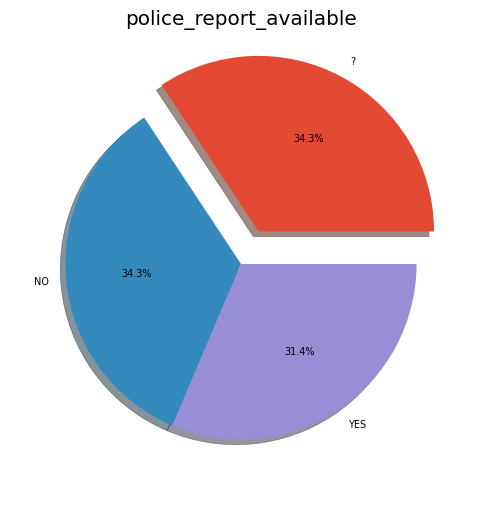

In [211]:
# Counting the frequency of unique elements
list_=ic['police_report_available']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for police_report_available

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.95, textprops={'fontsize':7})
plt.title('police_report_available')
plt.show()

**In most case police report is unknown and in 31.4% of cases report is available**

Unique Values : ['Accura' 'Audi' 'BMW' 'Chevrolet' 'Dodge' 'Ford' 'Honda' 'Jeep'
 'Mercedes' 'Nissan' 'Saab' 'Suburu' 'Toyota' 'Volkswagen']
Frequency Values : [68, 69, 72, 76, 80, 72, 55, 67, 65, 78, 80, 80, 70, 68]


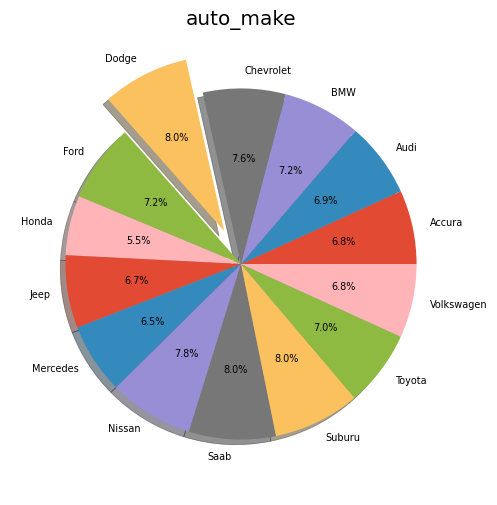

In [212]:
# Counting the frequency of unique elements
list_=ic['auto_make']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for auto_make

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.95, textprops={'fontsize':7})
plt.title('auto_make')
plt.show()

**Above is the percentage of cars involved in incidents**

Unique Values : ['N' 'Y']
Frequency Values : [753, 247]


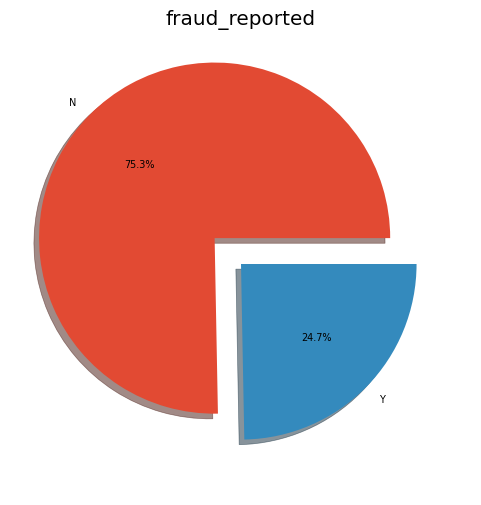

In [213]:
# Counting the frequency of unique elements
list_=ic['fraud_reported']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for fraud_reported

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.style.use('ggplot')
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.95, textprops={'fontsize':7})
plt.title('fraud_reported')
plt.show()

**More than 75% claims are not fraud**

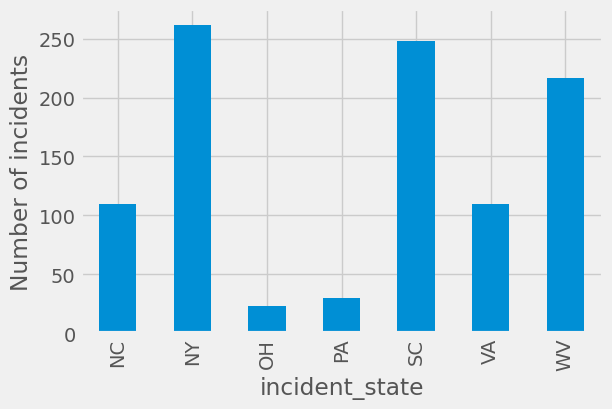

In [214]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
ic.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
plt.ylabel('Number of incidents')
plt.show()

**Above plot is showing that NY has reported most number of incidents while PA & OH has reported least number of incidents**

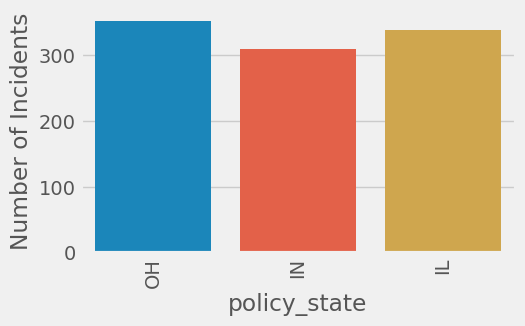

In [215]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'policy_state', data=ic) 
plt.xlabel('policy_state')
plt.xticks(rotation=90)
plt.ylabel('Number of Incidents')
plt.show()

**Most people who were involved in the incidents have policy from the state OH**

<AxesSubplot:xlabel='age', ylabel='count'>

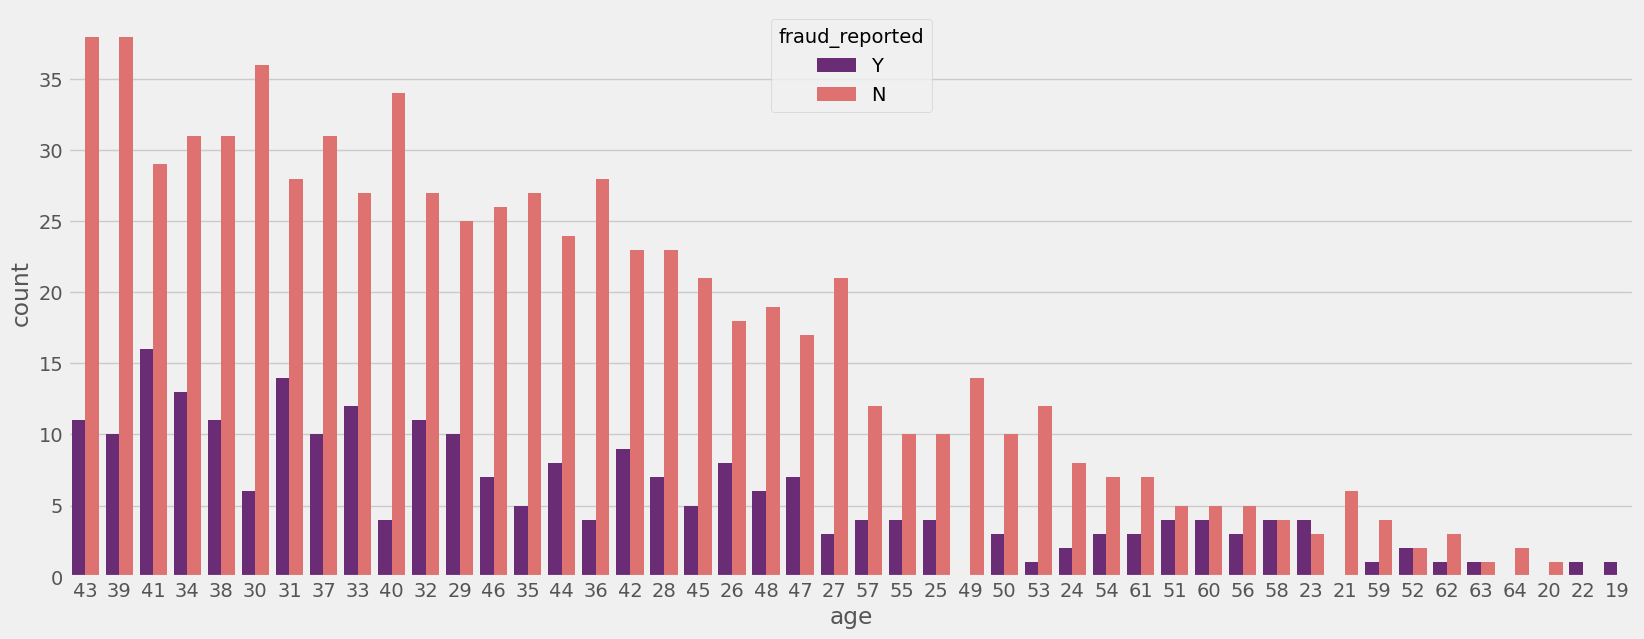

In [216]:
plt.figure(figsize=(18,7),dpi=100)
sns.countplot(data=ic,x='age',hue='fraud_reported',order=ic['age'].value_counts().index,palette='magma')

**People with age of 41 are are most likely to do the fraud while the people with the age of 53 are least likely to do the fraud**

Text(0.5, 1.0, 'Distribution of policy annual premium')

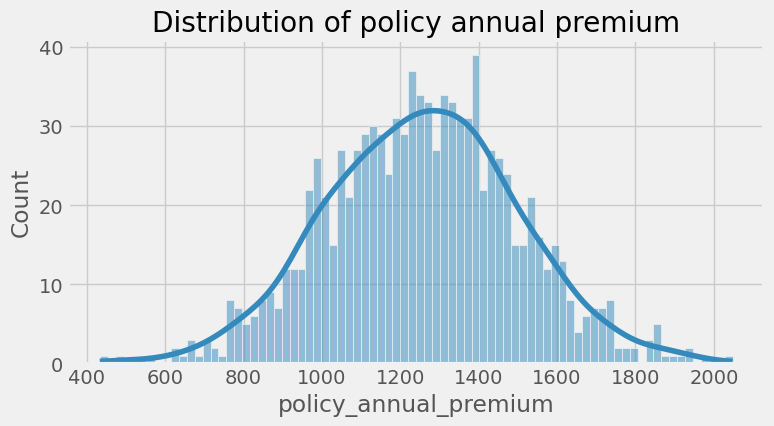

In [217]:
# Checking Distribution of policy annual premium with histplot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4),dpi=100)
sns.histplot(data=ic,x='policy_annual_premium',kde=True,bins=80)
plt.title('Distribution of policy annual premium')

**Most people pay the premium of 1200 to 1400 and very few pay the premium of 600 to 800 and 1800 to 2000**

Text(0.5, 1.0, 'Distribution of capital-gains')

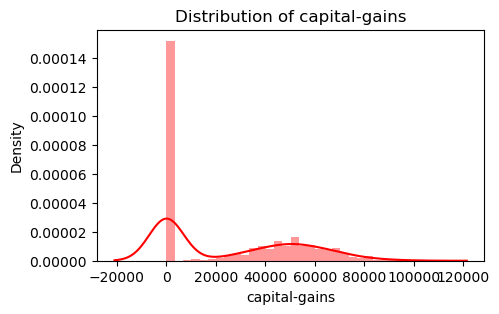

In [218]:
# Checking Distribution of capital_gains
plt.style.use('default')
plt.figure(figsize=(5,3))
sns.distplot(ic['capital-gains'],bins=30,color='red')
plt.title('Distribution of capital-gains')

**Majority of people have no captal gains and very few have capital gains from 20000 to 80000**

Text(0.5, 1.0, 'Distribution of capital-loss')

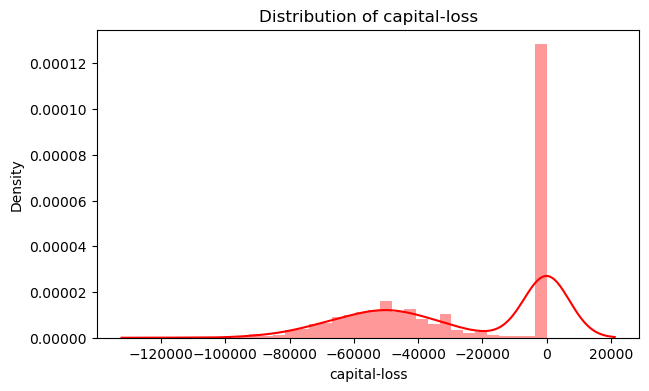

In [219]:
# Checking Distribution of capital_loss
plt.style.use('default')
plt.figure(figsize=(7,4))
sns.distplot(ic['capital-loss'],bins=30,color='red')
plt.title('Distribution of capital-loss')

**Majority of people have no captal loss and very few have capital loss from 20000 to 80000**

Text(0.5, 1.0, 'Distribution of total_claim_amount')

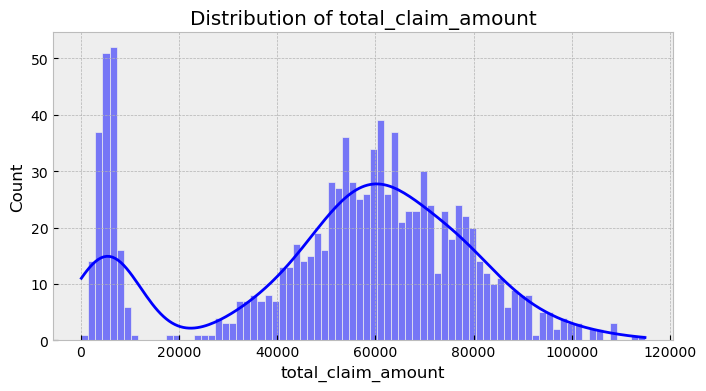

In [220]:
# Checking Distribution of total_claim_amount with histplot
plt.style.use('bmh')
plt.figure(figsize=(8,4),dpi=100)
sns.histplot(data=ic,x='total_claim_amount',kde=True,bins=80)
plt.title('Distribution of total_claim_amount')

**Maximum people have claim amount of less than 20000 and very few have more than 100000**

In [221]:
ic.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Vehicle_age,incident_period_of_the_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,Y,11,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,Y,8,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,N,8,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,1,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,N,6,evening


In [222]:
# Checking correlation
ic.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,Vehicle_age
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,-0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,-0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,-0.009893
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,-0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,0.056615
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,-0.034554
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,0.020527
witnesses,0.058383,0.052359,0.066639,0.002332,-0.006738,-0.017651,-0.041330,-0.014669,-0.005606,1.000000,-0.011114,-0.024843,0.052640,-0.022564,-0.045791


<AxesSubplot:>

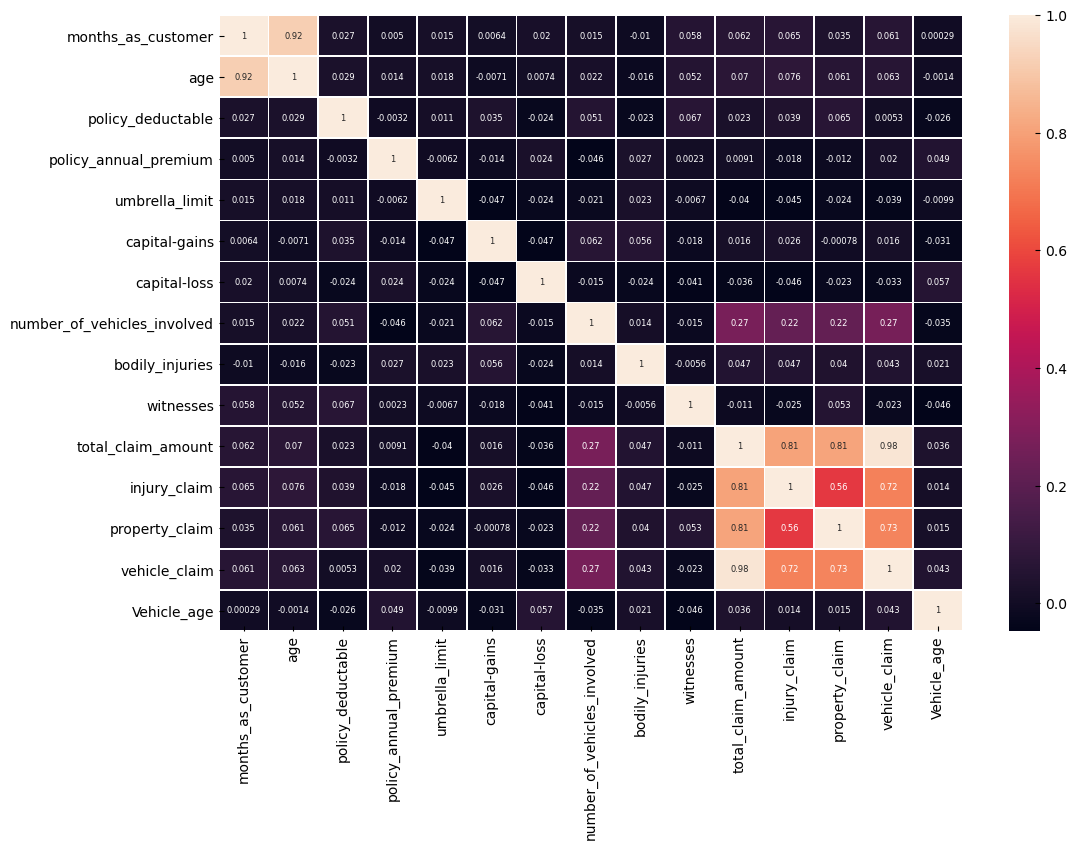

In [223]:
# plotting heatmap to see the correlation
plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(ic.corr(),annot=True,linewidth=0.5,linecolor='White',annot_kws={'fontsize':6})

**Key Observations :**

1. Months as customer and age is highly correlated with each other

2. Total claim amount, injury claim, property claim and vehicle claim are all highly correlated with each other

In [224]:
ic.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,Vehicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,9.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,15.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,20.000000


## Outliers

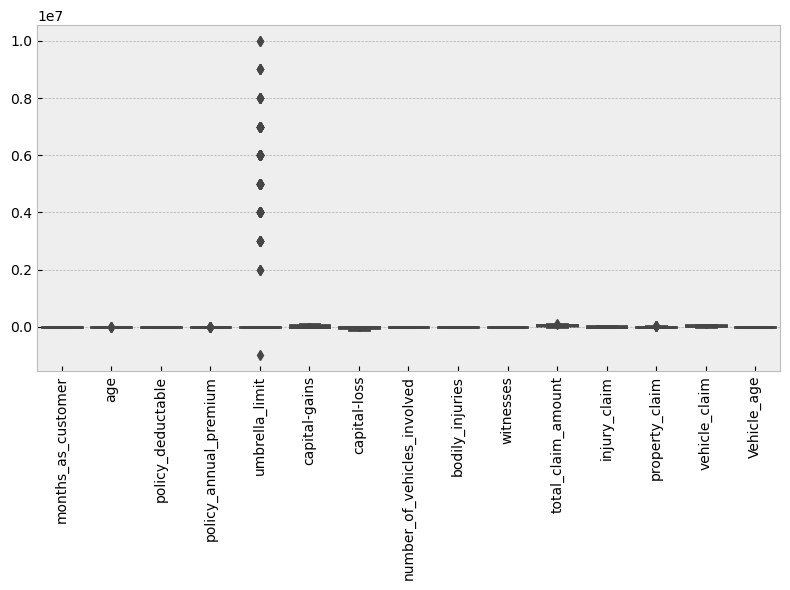

In [225]:
# Checking outliers by plotting dataset into boxplot
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data=ic)
plt.xticks(rotation=90)
plt.tight_layout()

**As we can see in above plot age, policy_annual_premium, total_claim_amount and property_claim has few outliers while umbrella_limit has huge number of outliers**

## Removing Outliers

In [226]:
ic.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Vehicle_age,incident_period_of_the_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,Y,11,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,Y,8,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,N,8,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,1,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,N,6,evening


In [227]:
from numpy import percentile

a=ic.columns
for i in a:
    if isinstance(ic[i][0],str):
        continue
    else:
        # Quartiles
        q=percentile(ic[i],[25,75])
        # Lower & Upper bound
        lower_bound= q[0] - (1.5*(q[1]-q[0]))
        upper_bound= q[1] + (1.5*(q[1]-q[0]))
        ic[i] = ic[i].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

**We have removed the outliers higher than the upper whisker by the value of the upper whisker and the outliers lower than the lower whisker by the value of the lower whisker.**

## Again checking the Outliers

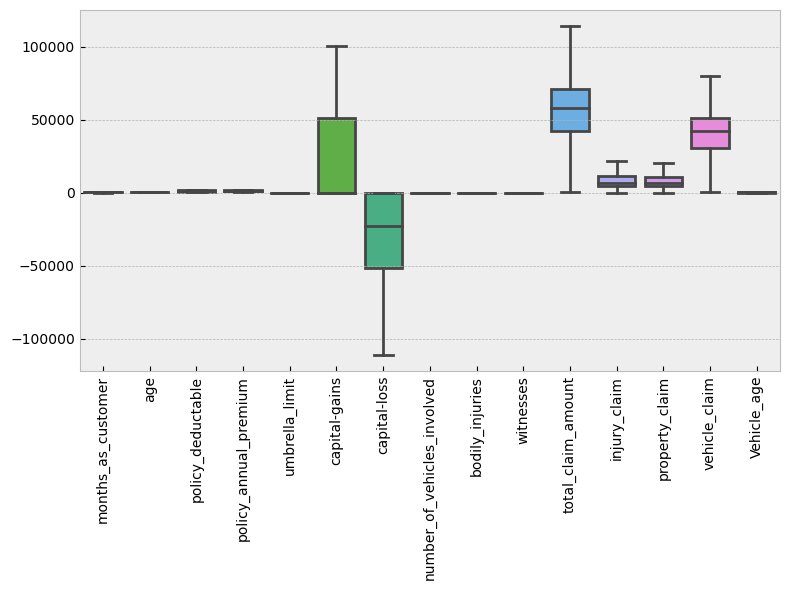

In [228]:
# Checking outliers by plotting dataset into boxplot
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data=ic)
plt.xticks(rotation=90)
plt.tight_layout()

**We can see that there are no outliers present in our data.**

### Converting Categorical data of "ic" into integer

**Now we will convert the categorical variable like *'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'fraud_reported', 'incident_period_of_the_day'* into numeric.**

**We will apply encoding to the variable like *'policy_state', 'policy_csl', 'insured_sex', 'collision_type','property_damage', 'police_report_available', 'fraud_reported'***

**We will apply get_dummies to the variables like *'insured_occupation', 'insured_hobbies', 'insured_relationship', 'insured_education_level', 'incident_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city''incident_period_of_the_day'*. it will create equal number of columns with 1's and 0's, 1 will indicated that category is present and 0 will indicate absent**

In [229]:
# Checking if '?' is present in variables or not
unknown={}
for i in list(ic.columns):
    if (ic[i]).dtype == object:
        j = np.sum(ic[i] == '?')
        unknown[i] = j
        
unknown=pd.DataFrame.from_dict(unknown, orient='index')
unknown

,0
policy_state,0
policy_csl,0
insured_sex,0
insured_education_level,0
insured_occupation,0
insured_hobbies,0
insured_relationship,0
incident_type,0
collision_type,178
incident_severity,0


**collision_type, property_damage and police_report_available have '?' values present**

In [230]:
# We are going to replace '?' with 0
ic['collision_type'].replace({'Rear Collision':1, 'Side Collision':2, 'Front Collision':3, '?':0}, inplace=True)
ic['property_damage'].replace({'?':0, 'NO':0, 'YES':1}, inplace=True)
ic['police_report_available'].replace({'?':0, 'NO':0, 'YES':1}, inplace=True)

In [232]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

d=['policy_state', 'policy_csl', 'insured_sex', 'fraud_reported']
for i in d:
    ic[i]=le.fit_transform(ic[i].astype(str))

In [234]:
insured_occupation_dummies=pd.get_dummies(ic.insured_occupation,prefix='insured_occupation')

# concating the insured_occupation_dummies with the dataframe
ic=pd.concat([ic,insured_occupation_dummies],axis=1)
ic.drop(columns='insured_occupation',inplace=True)


insured_hobbies_dummies=pd.get_dummies(ic.insured_hobbies,prefix='insured_hobbies')

# concating the insured_hobbies_dummies with the dataframe
ic=pd.concat([ic,insured_hobbies_dummies],axis=1)
ic.drop(columns='insured_hobbies',inplace=True)


insured_relationship_dummies=pd.get_dummies(ic.insured_relationship,prefix='insured_relationship')

# concating the insured_relationship_dummies with the dataframe
ic=pd.concat([ic,insured_relationship_dummies],axis=1)
ic.drop(columns='insured_relationship',inplace=True)


insured_education_level_dummies=pd.get_dummies(ic.insured_education_level,prefix='insured_education_level')

# concating the insured_education_level_dummies with the dataframe
ic=pd.concat([ic,insured_education_level_dummies],axis=1)
ic.drop(columns='insured_education_level',inplace=True)


incident_type_dummies=pd.get_dummies(ic.incident_type,prefix='incident_type')

# concating the incident_type_dummies with the dataframe
ic=pd.concat([ic,incident_type_dummies],axis=1)
ic.drop(columns='incident_type',inplace=True)


incident_severity_dummies=pd.get_dummies(ic.incident_severity,prefix='incident_severity')

# concating the incident_severity_dummies with the dataframe
ic=pd.concat([ic,incident_severity_dummies],axis=1)
ic.drop(columns='incident_severity',inplace=True)


authorities_contacted_dummies=pd.get_dummies(ic.authorities_contacted,prefix='authorities_contacted')

# concating the authorities_contacted_dummies with the dataframe
ic=pd.concat([ic,authorities_contacted_dummies],axis=1)
ic.drop(columns='authorities_contacted',inplace=True)


incident_state_dummies=pd.get_dummies(ic.incident_state,prefix='incident_state')

# concating the incident_state_dummies with the dataframe
ic=pd.concat([ic,incident_state_dummies],axis=1)
ic.drop(columns='incident_state',inplace=True)


incident_city_dummies=pd.get_dummies(ic.incident_city,prefix='incident_city')

# concating the incident_city_dummies with the dataframe
ic=pd.concat([ic,incident_city_dummies],axis=1)
ic.drop(columns='incident_city',inplace=True)


incident_period_of_the_day_dummies=pd.get_dummies(ic.incident_period_of_the_day,prefix='incident_period_of_the_day')

# concating the incident_period_of_the_day_dummies with the dataframe
ic=pd.concat([ic,incident_period_of_the_day_dummies],axis=1)
ic.drop(columns='incident_period_of_the_day',inplace=True)

In [251]:
ic['auto_model']

0          92x
1         E400
2          RAM
3        Tahoe
4          RSX
        ...   
995     Accord
996     Passat
997    Impreza
998         A5
999       E400
Name: auto_model, Length: 1000, dtype: object

In [252]:
# We'll drop variable 'auto_make' and 'auto_model' as it is of no use
ic.drop(['auto_make','auto_model'], axis=1, inplace=True)
ic.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,...,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,incident_period_of_the_day_afternoon,incident_period_of_the_day_early_morning,incident_period_of_the_day_evening,incident_period_of_the_day_fore-noon,incident_period_of_the_day_morning,incident_period_of_the_day_night,incident_period_of_the_day_past_midnight
0,328,48.0,2,1,1000,1406.91,0.0,1,53300,0,...,0,0,0,0,1,0,0,0,0,0
1,228,42.0,1,1,2000,1197.22,0.0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,134,29.0,2,0,2000,1413.14,0.0,0,35100,0,...,0,0,0,0,0,0,0,1,0,0
3,256,41.0,0,1,2000,1415.74,0.0,0,48900,-62400,...,0,0,0,0,1,0,0,0,0,0
4,228,44.0,0,2,1000,1583.91,0.0,1,66000,-46000,...,0,0,0,0,0,1,0,0,0,0


**Now our categorical data is converted into numeric.**

## Model Creation for Fraud Reported

In [255]:
ic.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,...,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,incident_period_of_the_day_afternoon,incident_period_of_the_day_early_morning,incident_period_of_the_day_evening,incident_period_of_the_day_fore-noon,incident_period_of_the_day_morning,incident_period_of_the_day_night,incident_period_of_the_day_past_midnight
0,328,48.0,2,1,1000,1406.91,0.0,1,53300,0,...,0,0,0,0,1,0,0,0,0,0
1,228,42.0,1,1,2000,1197.22,0.0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,134,29.0,2,0,2000,1413.14,0.0,0,35100,0,...,0,0,0,0,0,0,0,1,0,0
3,256,41.0,0,1,2000,1415.74,0.0,0,48900,-62400,...,0,0,0,0,1,0,0,0,0,0
4,228,44.0,0,2,1000,1583.91,0.0,1,66000,-46000,...,0,0,0,0,0,1,0,0,0,0


In [256]:
x=ic.drop(columns=['fraud_reported'])
y=ic[['fraud_reported']]

print(x.shape)
print(y.shape)

(1000, 102)
(1000, 1)


**We have created two variables containing Input data (x) and Output data (y).**

In [259]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

**We've splitted our dataset into training and testing, where we have used our 80% of data for training and 20% of data for testing**

### Scaling x_train and x_test using Standard Scaler

In [260]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Making a function to calculate and print following features for the model : Accuracy Score, Confusion Matrix, Classification Report.**

In [262]:
# Creating function for checking accuracy score, confusion matrix and classification report of prediction models
def classifier_func(y_test,pred):
    ac=accuracy_score(y_test,pred)
    cm=confusion_matrix(y_test,pred)
    cr=classification_report(y_test,pred)
    
    print('Accuracy Score :',ac,'\n')
    print('Confusion Matrix :',cm,'\n')
    print('Classification Report :',cm,'\n')

**Making a Cross Validation function**

In [263]:
from sklearn.model_selection import cross_val_score
def cross_val_accuracy(model,x_train=x_train,y_train=y_train):
    accuracies=cross_val_score(estimator=model,X = x_train, y = y_train ,cv=10)
    print('Cross_val_Accuracy: {:.2f} %'.format(accuracies.mean()*100),'\n')
    print('Cross_val_Standard Deviation: {:.2f} %'.format(accuracies.std()*100),'\n')

### Logistic Regression

**Creating Logistic Regression Model, it'll fit the Logistic Regression model on x_train and y_train and predict the x_test and store it in pred. We will print predicted Fraud and actual Fraud and outputs of the above functions**

In [264]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('\033[1m' + 'LOGISTIC REGRESSION MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred)
cross_val_accuracy(lr)

print('Predicted Fraud',pred)
print('\nActual Fraud\n',y_test)

LOGISTIC REGRESSION MODEL SUMMERY

Accuracy Score : 0.86 

Confusion Matrix : [[138  17]
 [ 11  34]] 

Classification Report : [[138  17]
 [ 11  34]] 

Cross_val_Accuracy: 81.75 % 

Cross_val_Standard Deviation: 4.34 % 

Predicted Fraud [0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0]

Actual Fraud
      fraud_reported
316               0
459               0
854               0
11                0
978               0
..              ...
37                0
981               0
38                0
333               0
157               0

[200 rows x 1 columns]


### Decision Tree Classifier

**Creating Decision Tree Classifier Model, it'll fit the Decision Tree Classifier model on x_train and y_train and predict the x_test and store it in pred_dtc. We will print predicted Fraud and actual Fraud and outputs of the above functions**

In [265]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print('\033[1m' + 'DECISION TREE CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_dtc)
cross_val_accuracy(dtc)

print('Predicted Fraud',pred_dtc)
print('\nActual Fraud\n',y_test)

DECISION TREE CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.755 

Confusion Matrix : [[127  28]
 [ 21  24]] 

Classification Report : [[127  28]
 [ 21  24]] 

Cross_val_Accuracy: 77.62 % 

Cross_val_Standard Deviation: 4.95 % 

Predicted Fraud [0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

Actual Fraud
      fraud_reported
316               0
459               0
854               0
11                0
978               0
..              ...
37                0
981               0
38                0
333               0
157               0

[200 rows x 1 columns]


### KNeighbors Classifier

**Creating KNeighbors Classifier Model, it'll fit the KNeighbors Classifier model on x_train and y_train and predict the x_test and store it in pred_knc. We will print predicted Fraud and actual Fraud and outputs of the above functions**

In [266]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)

print('\033[1m' + 'KNEIGHBORS CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_knc)
cross_val_accuracy(knc)

print('Predicted Fraud',pred_knc)
print('\nActual Fraud\n',y_test)

KNEIGHBORS CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.785 

Confusion Matrix : [[139  16]
 [ 27  18]] 

Classification Report : [[139  16]
 [ 27  18]] 

Cross_val_Accuracy: 77.50 % 

Cross_val_Standard Deviation: 3.16 % 

Predicted Fraud [0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0]

Actual Fraud
      fraud_reported
316               0
459               0
854               0
11                0
978               0
..              ...
37                0
981               0
38                0
333               0
157               0

[200 rows x 1 columns]


### Gradient Boosting Classifier

**Creating Gradient Boosting Classifier Model, it'll fit the Gradient Boosting Classifier model on x_train and y_train and predict the x_test and store it in pred_gc. We will print predicted Fraud and actual Fraud and outputs of the above functions**

In [267]:
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
pred_gc=gc.predict(x_test)

print('\033[1m' + 'GRADIENT BOOSTING CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_gc)
cross_val_accuracy(gc)

print('Predicted Fraud',pred_gc)
print('\nActual Fraud\n',y_test)

GRADIENT BOOSTING CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.84 

Confusion Matrix : [[137  18]
 [ 14  31]] 

Classification Report : [[137  18]
 [ 14  31]] 

Cross_val_Accuracy: 81.00 % 

Cross_val_Standard Deviation: 5.21 % 

Predicted Fraud [0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0]

Actual Fraud
      fraud_reported
316               0
459               0
854               0
11                0
978               0
..              ...
37                0
981               0
38                0
333               0
157               0

[200 rows x 1 columns]


### The best performing model for "Fraud Reported" is Logistic Regression

### Model Saving

In [268]:
import pickle
filename='insurance_claim_fraud_pred_model.pkl'
pickle.dump(lr,open(filename,'wb'))

**Logistic Regression is saved with the name "insurance_claim_fraud_pred_model"**

## Conclusion

In [269]:
# printing the predicted result and the actual result
print('Predicted Result','\n', pred)
print('Actual Result','\n', y_test)

Predicted Result 
 [0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0]
Actual Result 
      fraud_reported
316               0
459               0
854               0
11                0
978               0
..              ...
37                0
981               0
38                0
333               0
157               0

[200 rows x 1 columns]


**As we can see above the model is predicted quite well**

# THE END